In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [4]:
# Загрузка датасета
data = pd.read_csv('train (5).csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train (5).csv'

In [ ]:
data.head(5)
df = data.copy()

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
# Исследование датасета
df["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
df.shape

(100000, 28)

In [ ]:
# Показать первые строки датасета для предварительного осмотра
print("Первые строки датасета:")
print(df.head())

# Получение суммарной информации о датасете
print("\nИнформация о датасете:")
df.info()

# Показать описательную статистику для числовых колонок
print("\nОписательная статистика для числовых колонок:")
print(df.describe())


Первые строки датасета:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit

In [ ]:
df.drop(["ID","Customer_ID","Month","Name","SSN","Age","Occupation"],axis = 1,inplace = True)

In [ ]:
df.isna().sum()

Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
df.dtypes

Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [ ]:
def impute_dataset(df):
    for col_name in df.columns:
        if df[col_name].isna().sum() > 0 and df[col_name].nunique() > 5 and df[col_name].dtypes != "object":
            df[col_name].fillna(df[col_name].mean(),inplace = True)
        elif df[col_name].isna().sum() > 0 and df[col_name].nunique() < 5 and df[col_name].dtypes != "object":
            df[col_name].fillna(df[col_name].mode().iloc[0],inplace = True)

In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: ', '.join(set(item.replace(" and ", "").strip() for item in str(x).split(','))))

In [ ]:
df['Type_of_Loan']

0        Credit-Builder Loan, Personal Loan, Auto Loan,...
1        Credit-Builder Loan, Personal Loan, Auto Loan,...
2        Credit-Builder Loan, Personal Loan, Auto Loan,...
3        Credit-Builder Loan, Personal Loan, Auto Loan,...
4        Credit-Builder Loan, Personal Loan, Auto Loan,...
                               ...                        
99995                              Student Loan, Auto Loan
99996                              Student Loan, Auto Loan
99997                              Student Loan, Auto Loan
99998                              Student Loan, Auto Loan
99999                              Student Loan, Auto Loan
Name: Type_of_Loan, Length: 100000, dtype: object

In [ ]:
unique_values_set = set()

for value in df["Type_of_Loan"]:
    value_list = [item.replace(" and ","").strip() for item in str(value).split(",") if item.strip() not in unique_values_set]
    unique_values_set.update(value_list)

unique_values = list(unique_values_set)

In [ ]:
print(unique_values_set)

{'Credit-Builder Loan', 'nan', 'Student Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan', 'Debt Consolidation Loan'}


In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and','')

In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.strip('')

In [ ]:
df['Type_of_Loan'][0]

'Credit-Builder Loan, Personal Loan, Auto Loan, Home Equity Loan'

In [ ]:
dummies = df['Type_of_Loan'].str.get_dummies(", ")

In [ ]:
df = pd.concat([df, dummies], axis = 1)

In [ ]:
df.shape

(100000, 31)

In [ ]:
df.drop("Type_of_Loan",axis=1,inplace = True)

In [ ]:
df.shape

(100000, 30)

In [ ]:
df.nunique()

Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
Auto Loan                        2
Credit-Builder Loan              2
Debt Consolidation Loan          2
Home Equity Loan                 2
Mortgage Loan                    2
Not Specified                    2
Payday Loan                      2
Personal Loan                    2
Student Loan        

In [ ]:
df.drop("nan",axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  object 
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  object 
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    92998 non-null   object 
 8   Changed_Credit_Limit      100000 non-null  object 
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   ob

In [ ]:
df["Credit_Mix"].isna().sum()

0

In [ ]:
df["Payment_Behaviour"].nunique()

7

In [ ]:
df.head(5)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
1,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
2,19114.12,NaN,3,4,3,4,3,7,_,4.0,...,Good,1,1,0,1,0,0,0,1,0
3,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
4,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0


In [ ]:
for item in df["Credit_History_Age"].head(5):
    print(item)

22 Years and 1 Months
nan
22 Years and 3 Months
22 Years and 4 Months
22 Years and 5 Months


In [ ]:
df["Credit_History_Age"] = df["Credit_History_Age"].apply(lambda x: float(x.split()[0]) + (float(x.split()[3])/12) if pd.notna(x) else x)

In [ ]:
df.head(5)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
1,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
2,19114.12,NaN,3,4,3,4,3,7,_,4.0,...,Good,1,1,0,1,0,0,0,1,0
3,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
4,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0


In [ ]:
df["Credit_History_Age"]

0        22.083333
1              NaN
2        22.250000
3        22.333333
4        22.416667
           ...    
99995    31.500000
99996    31.583333
99997    31.666667
99998    31.750000
99999    31.833333
Name: Credit_History_Age, Length: 100000, dtype: float64

In [ ]:
df.dtypes

Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
Auto Loan                     int64
Credit-Builder Loan           int64
Debt Consolidation Loan       int64
Home Equity Loan              int64
Mortgage Loan                 int64
Not Specified                 int64
Payday Loan                   int64
Personal Loan               

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
def encode_dataset(df):
    for col_name in df.columns:
        if df[col_name].dtypes == "object":
            df[col_name] = encoder.fit_transform(df[col_name])

In [ ]:
df["Payment_Behaviour"] = encoder.fit_transform(df["Payment_Behaviour"])

In [ ]:
df["Payment_of_Min_Amount"] = encoder.fit_transform(df["Payment_of_Min_Amount"])

In [ ]:
df.dtypes

Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour             int32
Monthly_Balance              object
Credit_Score                 object
Auto Loan                     int64
Credit-Builder Loan           int64
Debt Consolidation Loan       int64
Home Equity Loan              int64
Mortgage Loan                 int64
Not Specified                 int64
Payday Loan                   int64
Personal Loan               

In [ ]:
df.nunique()

Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
Auto Loan                        2
Credit-Builder Loan              2
Debt Consolidation Loan          2
Home Equity Loan                 2
Mortgage Loan                    2
Not Specified                    2
Payday Loan                      2
Personal Loan                    2
Student Loan        

In [ ]:
df["Num_of_Delayed_Payment"]

0          7
1        NaN
2          7
3          4
4        NaN
        ... 
99995      7
99996      7
99997      6
99998    NaN
99999      6
Name: Num_of_Delayed_Payment, Length: 100000, dtype: object

In [ ]:
df.dtypes

Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour             int32
Monthly_Balance              object
Credit_Score                 object
Auto Loan                     int64
Credit-Builder Loan           int64
Debt Consolidation Loan       int64
Home Equity Loan              int64
Mortgage Loan                 int64
Not Specified                 int64
Payday Loan                   int64
Personal Loan               

In [ ]:
for col_name in df.columns:
    if df[col_name].dtypes == "object" and col_name != "Credit_Mix":
        df[col_name] = df[col_name].str.replace("_","")
        df[col_name] = pd.to_numeric(df[col_name],errors='coerce')

In [ ]:
df.dtypes

Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                float64
Auto Loan                     int64
Credit-Builder Loan           int64
Debt Consolidation Loan       int64
Home Equity Loan              int64
Mortgage Loan                 int64
Not Specified                 int64
Payday Loan                   int64
Personal Loan               

In [ ]:
df.isna().sum()

Annual_Income                    0
Monthly_Inhand_Salary        15002
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment        7002
Changed_Credit_Limit          2091
Num_Credit_Inquiries          1965
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age            9030
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       4479
Payment_Behaviour                0
Monthly_Balance               2868
Credit_Score                100000
Auto Loan                        0
Credit-Builder Loan              0
Debt Consolidation Loan          0
Home Equity Loan                 0
Mortgage Loan                    0
Not Specified                    0
Payday Loan                      0
Personal Loan                    0
Student Loan        

In [ ]:
df.nunique()

Annual_Income                13487
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    414
Delay_from_due_date             73
Num_of_Delayed_Payment         711
Changed_Credit_Limit          4375
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              97124
Credit_Score                     0
Auto Loan                        2
Credit-Builder Loan              2
Debt Consolidation Loan          2
Home Equity Loan                 2
Mortgage Loan                    2
Not Specified                    2
Payday Loan                      2
Personal Loan                    2
Student Loan        

In [ ]:
for col_name in df.columns:
    if df[col_name].isna().sum() > 0 and df[col_name].nunique()>7:
        df[col_name] = df[col_name].fillna(df[col_name].mean())
    elif df[col_name].isna().sum() > 0 and df[col_name].nunique()<=7:
        df[col_name] = df[col_name].fillna(df[col_name].mode())

In [ ]:
df.isna().sum()

Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly          0
Payment_Behaviour                0
Monthly_Balance                  0
Credit_Score                100000
Auto Loan                        0
Credit-Builder Loan              0
Debt Consolidation Loan          0
Home Equity Loan                 0
Mortgage Loan                    0
Not Specified                    0
Payday Loan                      0
Personal Loan                    0
Student Loan        

In [ ]:
df["Credit_Mix"]

0           _
1        Good
2        Good
3        Good
4        Good
         ... 
99995       _
99996       _
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: object

In [ ]:
df_test = df[df["Credit_Mix"] == "_"]

In [ ]:
df.drop(df[df["Credit_Mix"] == "_"].index,inplace=True)

In [ ]:
df.dtypes

Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                float64
Auto Loan                     int64
Credit-Builder Loan           int64
Debt Consolidation Loan       int64
Home Equity Loan              int64
Mortgage Loan                 int64
Not Specified                 int64
Payday Loan                   int64
Personal Loan               

In [ ]:
df["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
df["Credit_Mix"]= encoder.fit_transform(df["Credit_Mix"])

In [ ]:
df["Credit_Mix"].unique()

array([1, 2, 0])

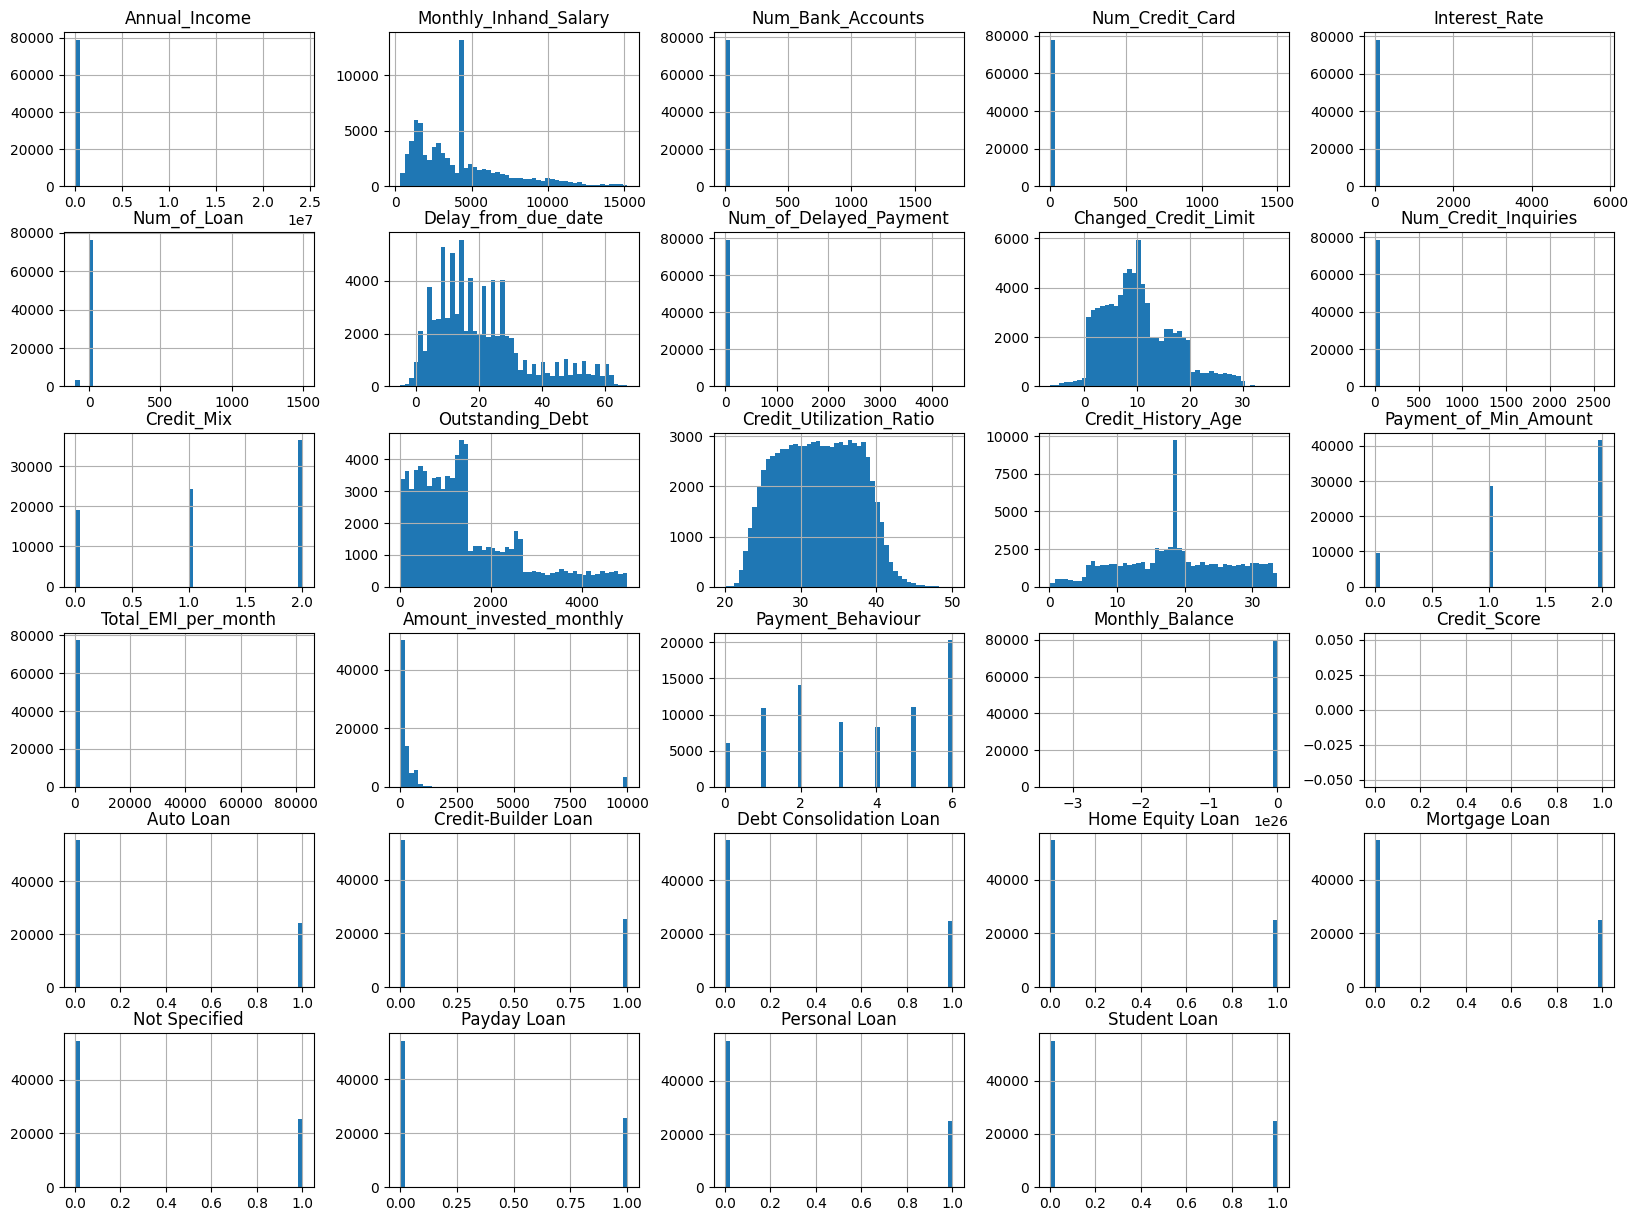

In [ ]:
df.hist(bins=50, figsize = [20,15])
plt.show()

<Axes: >

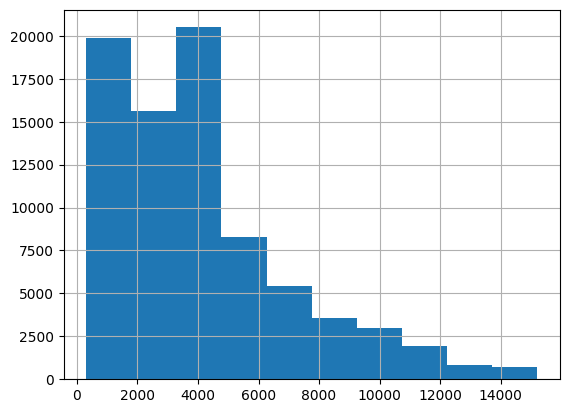

In [ ]:
df["Monthly_Inhand_Salary"].hist()

<Axes: >

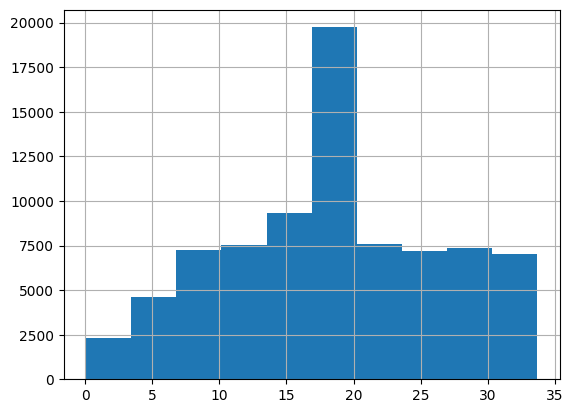

In [ ]:
df["Credit_History_Age"].hist()

<Axes: ylabel='Credit_History_Age'>

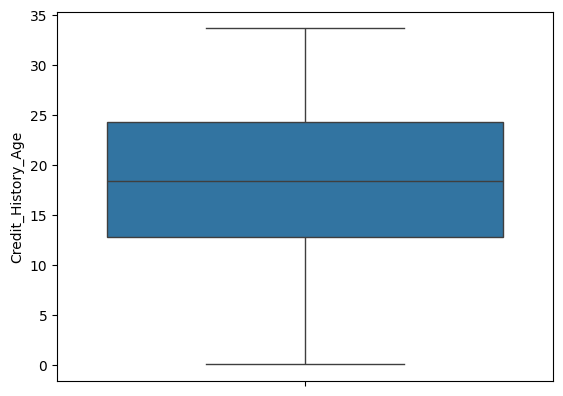

In [ ]:
sns.boxplot(df["Credit_History_Age"])

<Axes: ylabel='Monthly_Inhand_Salary'>

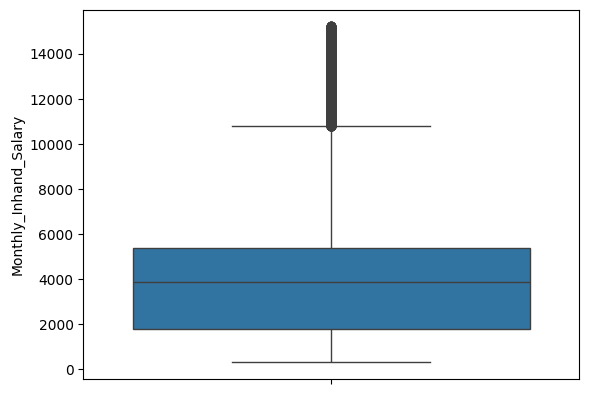

In [ ]:
sns.boxplot(df["Monthly_Inhand_Salary"])

<Axes: >

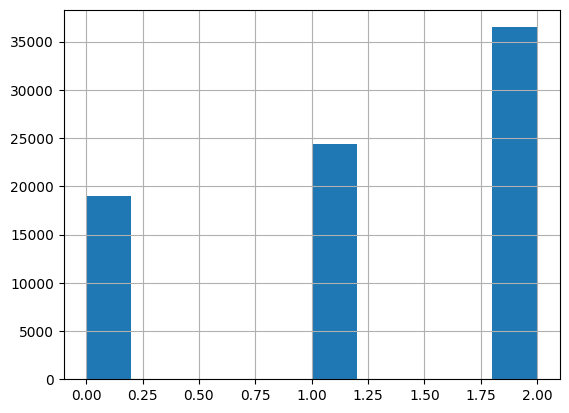

In [ ]:
df[df["Credit_Mix"]!= "_"]["Credit_Mix"].hist()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
for col_name in df.columns:
    if df[col_name].dtypes == "float64":
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [ ]:
# Обучение модели логистической регресси
from sklearn.model_selection import train_test_split

# Logistic Regression
from sklearn.linear_model import LogisticRegression
df.isna().mean() * 100

Annual_Income                 0.0
Monthly_Inhand_Salary         0.0
Num_Bank_Accounts             0.0
Num_Credit_Card               0.0
Interest_Rate                 0.0
Num_of_Loan                   0.0
Delay_from_due_date           0.0
Num_of_Delayed_Payment        0.0
Changed_Credit_Limit          0.0
Num_Credit_Inquiries          0.0
Credit_Mix                    0.0
Outstanding_Debt              0.0
Credit_Utilization_Ratio      0.0
Credit_History_Age            0.0
Payment_of_Min_Amount         0.0
Total_EMI_per_month           0.0
Amount_invested_monthly       0.0
Payment_Behaviour             0.0
Monthly_Balance               0.0
Credit_Score                100.0
Auto Loan                     0.0
Credit-Builder Loan           0.0
Debt Consolidation Loan       0.0
Home Equity Loan              0.0
Mortgage Loan                 0.0
Not Specified                 0.0
Payday Loan                   0.0
Personal Loan                 0.0
Student Loan                  0.0
dtype: float64

In [ ]:
df = df.drop("Credit_Score", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df.drop("Credit_Mix",axis=1), df["Credit_Mix"], test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [ ]:
df.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')

In [ ]:
# Импорт необходимых библиотек
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop("Auto Loan", axis=1)
y = df["Auto Loan"]

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель дерева решений
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Предсказание на тестовом наборе
predicted = dt.predict(X_test)

# Вывод отчета о классификации
print(mt.classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11092
           1       0.91      0.91      0.91      4869

    accuracy                           0.95     15961
   macro avg       0.94      0.94      0.94     15961
weighted avg       0.95      0.95      0.95     15961



In [ ]:
df.columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')

In [ ]:
# Импорт необходимых библиотек
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop("Auto Loan", axis=1)
y = df["Auto Loan"]

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Предсказание на тестовом наборе
predicted = rf.predict(X_test)

# Вывод отчета о классификации
print(mt.classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11092
           1       0.99      0.95      0.97      4869

    accuracy                           0.98     15961
   macro avg       0.99      0.97      0.98     15961
weighted avg       0.98      0.98      0.98     15961



In [ ]:
df.columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Предсказание на тестовом наборе
predicted = lr.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)

# Вывод результатов
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


NameError: name 'lr' is not defined

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

(100000, 28)

Первые строки датасета:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit

Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

0        Credit-Builder Loan, Personal Loan, Auto Loan,...
1        Credit-Builder Loan, Personal Loan, Auto Loan,...
2        Credit-Builder Loan, Personal Loan, Auto Loan,...
3        Credit-Builder Loan, Personal Loan, Auto Loan,...
4        Credit-Builder Loan, Personal Loan, Auto Loan,...
                               ...                        
99995                              Student Loan, Auto Loan
99996                              Student Loan, Auto Loan
99997                              Student Loan, Auto Loan
99998                              Student Loan, Auto Loan
99999                              Student Loan, Auto Loan
Name: Type_of_Loan, Length: 100000, dtype: object

{'Credit-Builder Loan', 'nan', 'Student Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan', 'Debt Consolidation Loan'}


'Credit-Builder Loan, Personal Loan, Auto Loan, Home Equity Loan'

(100000, 31)

(100000, 30)

Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
Auto Loan                        2
Credit-Builder Loan              2
Debt Consolidation Loan          2
Home Equity Loan                 2
Mortgage Loan                    2
Not Specified                    2
Payday Loan                      2
Personal Loan                    2
Student Loan        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  object 
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  object 
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    92998 non-null   object 
 8   Changed_Credit_Limit      100000 non-null  object 
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   ob

0

7

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
1,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
2,19114.12,NaN,3,4,3,4,3,7,_,4.0,...,Good,1,1,0,1,0,0,0,1,0
3,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
4,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0


22 Years and 1 Months
nan
22 Years and 3 Months
22 Years and 4 Months
22 Years and 5 Months


,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
1,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
2,19114.12,NaN,3,4,3,4,3,7,_,4.0,...,Good,1,1,0,1,0,0,0,1,0
3,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,...,Good,1,1,0,1,0,0,0,1,0
4,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,...,Good,1,1,0,1,0,0,0,1,0


0        22.083333
1              NaN
2        22.250000
3        22.333333
4        22.416667
           ...    
99995    31.500000
99996    31.583333
99997    31.666667
99998    31.750000
99999    31.833333
Name: Credit_History_Age, Length: 100000, dtype: float64

Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
Auto Loan                     int64
Credit-Builder Loan           int64
Debt Consolidation Loan       int64
Home Equity Loan              int64
Mortgage Loan                 int64
Not Specified                 int64
Payday Loan                   int64
Personal Loan               

Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour             int32
Monthly_Balance              object
Credit_Score                 object
Auto Loan                     int64
Credit-Builder Loan           int64
Debt Consolidation Loan       int64
Home Equity Loan              int64
Mortgage Loan                 int64
Not Specified                 int64
Payday Loan                   int64
Personal Loan               

Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
Auto Loan                        2
Credit-Builder Loan              2
Debt Consolidation Loan          2
Home Equity Loan                 2
Mortgage Loan                    2
Not Specified                    2
Payday Loan                      2
Personal Loan                    2
Student Loan        

0          7
1        NaN
2          7
3          4
4        NaN
        ... 
99995      7
99996      7
99997      6
99998    NaN
99999      6
Name: Num_of_Delayed_Payment, Length: 100000, dtype: object

Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour             int32
Monthly_Balance              object
Credit_Score                 object
Auto Loan                     int64
Credit-Builder Loan           int64
Debt Consolidation Loan       int64
Home Equity Loan              int64
Mortgage Loan                 int64
Not Specified                 int64
Payday Loan                   int64
Personal Loan               

Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                float64
Auto Loan                     int64
Credit-Builder Loan           int64
Debt Consolidation Loan       int64
Home Equity Loan              int64
Mortgage Loan                 int64
Not Specified                 int64
Payday Loan                   int64
Personal Loan               

Annual_Income                    0
Monthly_Inhand_Salary        15002
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment        7002
Changed_Credit_Limit          2091
Num_Credit_Inquiries          1965
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age            9030
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       4479
Payment_Behaviour                0
Monthly_Balance               2868
Credit_Score                100000
Auto Loan                        0
Credit-Builder Loan              0
Debt Consolidation Loan          0
Home Equity Loan                 0
Mortgage Loan                    0
Not Specified                    0
Payday Loan                      0
Personal Loan                    0
Student Loan        

Annual_Income                13487
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    414
Delay_from_due_date             73
Num_of_Delayed_Payment         711
Changed_Credit_Limit          4375
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              97124
Credit_Score                     0
Auto Loan                        2
Credit-Builder Loan              2
Debt Consolidation Loan          2
Home Equity Loan                 2
Mortgage Loan                    2
Not Specified                    2
Payday Loan                      2
Personal Loan                    2
Student Loan        

Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly          0
Payment_Behaviour                0
Monthly_Balance                  0
Credit_Score                100000
Auto Loan                        0
Credit-Builder Loan              0
Debt Consolidation Loan          0
Home Equity Loan                 0
Mortgage Loan                    0
Not Specified                    0
Payday Loan                      0
Personal Loan                    0
Student Loan        

0           _
1        Good
2        Good
3        Good
4        Good
         ... 
99995       _
99996       _
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: object

Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                float64
Auto Loan                     int64
Credit-Builder Loan           int64
Debt Consolidation Loan       int64
Home Equity Loan              int64
Mortgage Loan                 int64
Not Specified                 int64
Payday Loan                   int64
Personal Loan               

array(['Good', 'Standard', 'Bad'], dtype=object)

array([1, 2, 0])

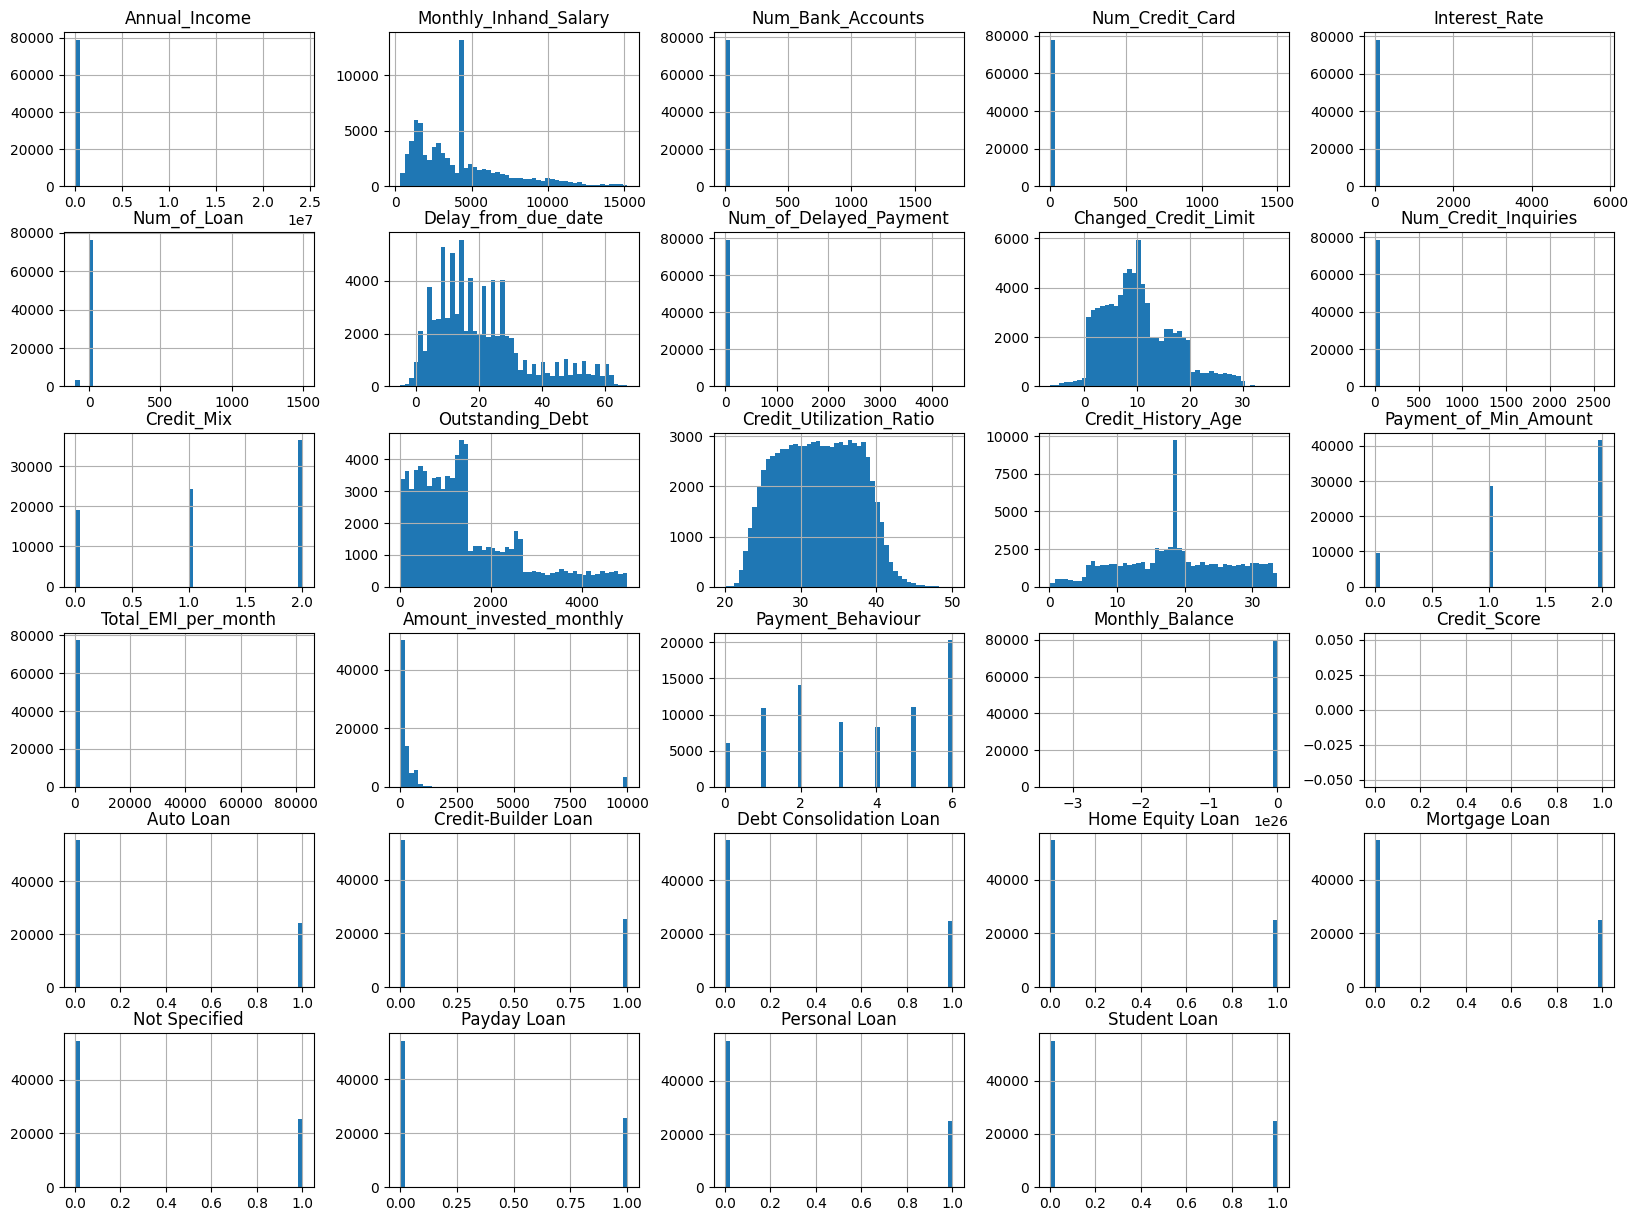

<Axes: >

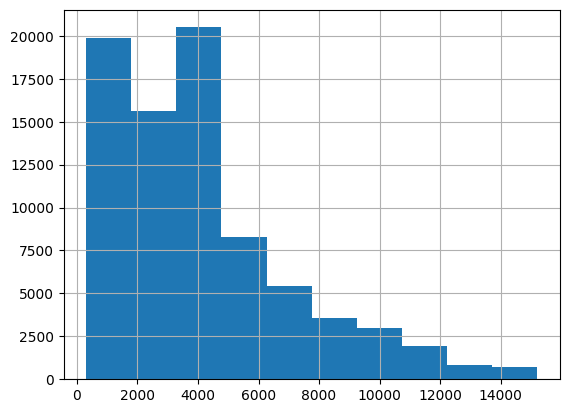

<Axes: >

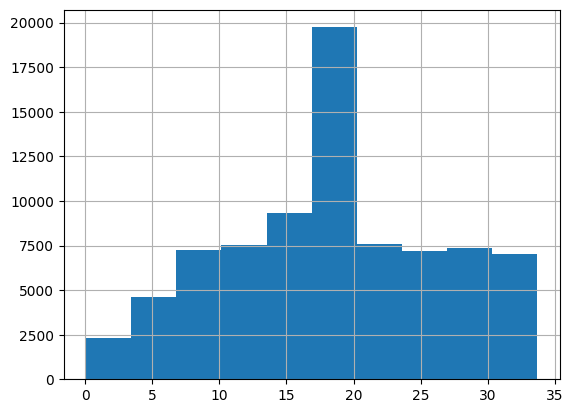

<Axes: ylabel='Credit_History_Age'>

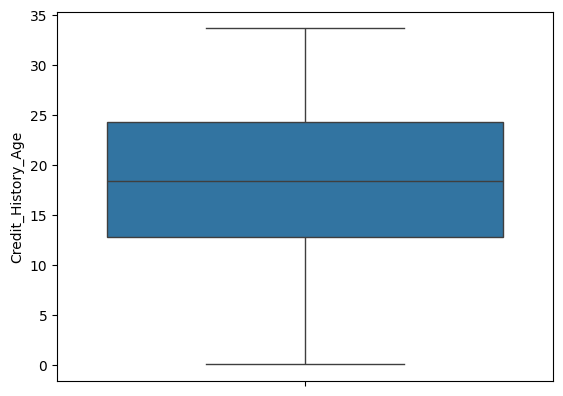

<Axes: ylabel='Monthly_Inhand_Salary'>

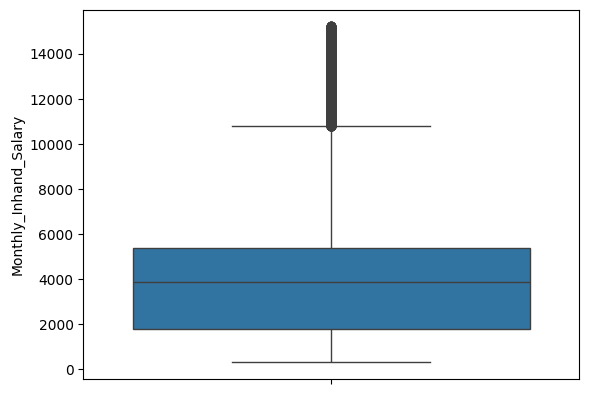

<Axes: >

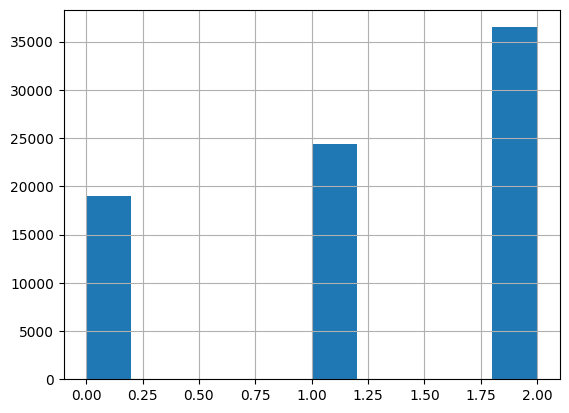

Annual_Income                 0.0
Monthly_Inhand_Salary         0.0
Num_Bank_Accounts             0.0
Num_Credit_Card               0.0
Interest_Rate                 0.0
Num_of_Loan                   0.0
Delay_from_due_date           0.0
Num_of_Delayed_Payment        0.0
Changed_Credit_Limit          0.0
Num_Credit_Inquiries          0.0
Credit_Mix                    0.0
Outstanding_Debt              0.0
Credit_Utilization_Ratio      0.0
Credit_History_Age            0.0
Payment_of_Min_Amount         0.0
Total_EMI_per_month           0.0
Amount_invested_monthly       0.0
Payment_Behaviour             0.0
Monthly_Balance               0.0
Credit_Score                100.0
Auto Loan                     0.0
Credit-Builder Loan           0.0
Debt Consolidation Loan       0.0
Home Equity Loan              0.0
Mortgage Loan                 0.0
Not Specified                 0.0
Payday Loan                   0.0
Personal Loan                 0.0
Student Loan                  0.0
dtype: float64

LogisticRegression()

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11092
           1       0.91      0.91      0.91      4869

    accuracy                           0.95     15961
   macro avg       0.94      0.94      0.94     15961
weighted avg       0.95      0.95      0.95     15961



KeyError: "['Auto Loan'] not in index"

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11092
           1       0.99      0.95      0.97      4869

    accuracy                           0.98     15961
   macro avg       0.99      0.97      0.98     15961
weighted avg       0.98      0.98      0.98     15961



In [ ]:
# Проанализируйте результаты и сделайте выводы о качестве модели.
import sklearn.metrics as mt
print(mt.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11092
           1       0.99      0.95      0.97      4869

    accuracy                           0.98     15961
   macro avg       0.99      0.97      0.98     15961
weighted avg       0.98      0.98      0.98     15961

